# Sample Data

[-10.          -9.16666667  -8.33333333  -7.5         -6.66666667
  -5.83333333  -5.          -4.16666667  -3.33333333  -2.5
  -1.66666667  -0.83333333   0.           0.83333333   1.66666667
   2.5          3.33333333   4.16666667   5.           5.83333333
   6.66666667   7.5          8.33333333   9.16666667  10.        ]
[-8.71188125 -8.46690129 -7.48267145 -6.34150285 -5.86650028 -5.05659761
 -3.93158539 -2.52073676 -1.69009889 -1.48327202 -0.82965812 -0.10716928
  1.          1.55949739  2.50367521  3.51672798  4.97656778  5.81259657
  6.06841461  6.61006906  7.46683306  8.65849715  9.18399522  9.86643204
 11.28811875]
[ 5  2 19 16 11 22 17 24 23 14  1 10 13  8  6 18  4  9  7 20  3  0 21 15
 12]
[[-5.83333333 -8.33333333  5.83333333  3.33333333 -0.83333333  8.33333333
   4.16666667 10.          9.16666667  1.66666667 -9.16666667 -1.66666667
   0.83333333 -3.33333333 -5.          5.         -6.66666667 -2.5
  -4.16666667  6.66666667]] [[-5.05659761 -7.48267145  6.61006906  4.97656778

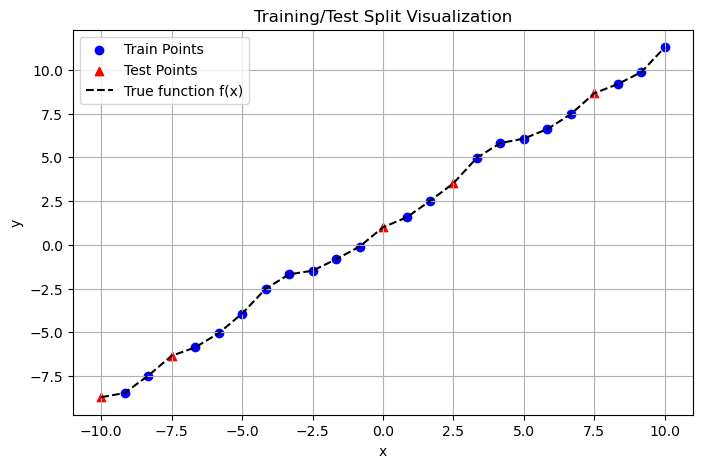

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)         # reproducibility

xs = np.linspace(-10,10,25)
print(xs)
ys = np.exp(-0.5*np.sin(xs**2)) + xs 
print(ys)

perm = np.random.permutation(len(xs))  # shuffle and split
print(perm)
xs_shuff, ys_shuff = xs[perm], ys[perm]
X_train, y_train = xs_shuff[:20].reshape(1,-1), ys_shuff[:20].reshape(1,-1)
print(X_train, y_train)
X_test,  y_test  = xs_shuff[20:].reshape(1,-1), ys_shuff[20:].reshape(1,-1)
print(X_test, y_test)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, c="blue", label="Train Points", marker="o")
plt.scatter(X_test, y_test, c="red", label="Test Points", marker="^")
plt.plot(xs, ys, 'k--', label="True function f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training/Test Split Visualization")
plt.legend()
plt.grid(True)
plt.show()


### Implementation of a 3-layer Neural Network with 1 neuron in each layer ###

Iter 0, train_loss=45.034749, val_loss=6.431095
Iter 1000, train_loss=33.901460, val_loss=3.466733
Iter 2000, train_loss=33.880909, val_loss=3.489561
Iter 3000, train_loss=33.875554, val_loss=3.517759
Iter 4000, train_loss=33.873084, val_loss=3.539268


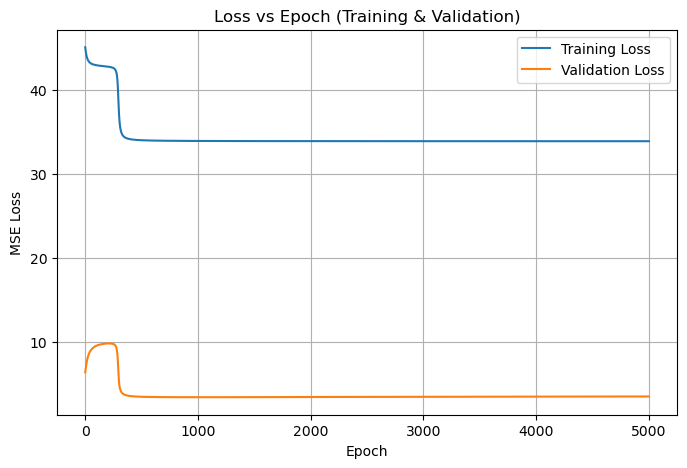

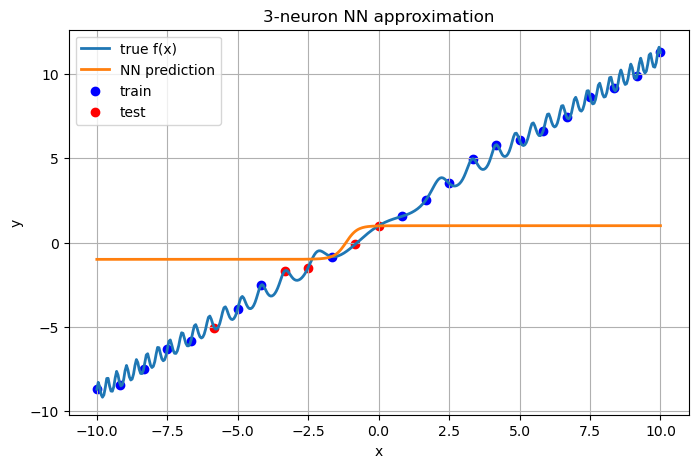

Train MSE: 33.871660652410924
Test  MSE: 3.5555225298414754


In [ ]:

### Activation Functions: ReLU and Tanh defined here ###
def tanh(z): return np.tanh(z)
def tanh_prime(z): return 1.0 - np.tanh(z)**2

def relu(z): return np.maximum(0, z)
def relu_prime(z): return (z > 0).astype(float)

### Select activation function that you want to test ###
activation = 'tanh'   # set to 'tanh' or 'relu'
g = tanh if activation == 'tanh' else relu
g_prime = tanh_prime if activation =='tanh' else relu_prime

### Generating random sample data ###
xs = np.linspace(-10,10,25)
ys = np.exp(-0.5*np.sin(xs**2)) + xs

perm = np.random.permutation(len(xs))
xs_sh, ys_sh = xs[perm], ys[perm]
X_train = xs_sh[:20].reshape(1,-1)   # shape (1, m)
Y_train = ys_sh[:20].reshape(1,-1)
X_test  = xs_sh[20:].reshape(1,-1)
Y_test  = ys_sh[20:].reshape(1,-1)

### Standardize the input data X  ###
x_mean, x_std = X_train.mean(), X_train.std()
X_train_s = (X_train - x_mean)/x_std
X_test_s  = (X_test - x_mean)/x_std

### Initialize parameters randomly with small magnitude ###
def init_params(seed=2):
    rng = np.random.RandomState(seed)
    # Weight matrix (1,1) since neuron output is scalar for each sample
    params = {
        "w1": rng.randn(1,1) * 0.1,
        "b1": np.zeros((1,1)),
        "w2": rng.randn(1,1) * 0.1,
        "b2": np.zeros((1,1)),
        "w3": rng.randn(1,1) * 0.1,
        "b3": np.zeros((1,1))
    }
    return params

# Performing  forward pass to calculate output and cost
def forward(params, X): 
    z1 = params['w1'] @ X + params['b1']   # @ is matrix multiplication (introduced in Python 3.5)
    a1 = g(z1)
    z2 = params['w2'] @ a1 + params['b2']
    a2 = g(z2)
    z3 = params['w3'] @ a2 + params['b3']
    a3 = g(z3)   # prediction shape (1,m)
    cache = (X, z1, a1, z2, a2, z3, a3)
    return a3, cache

# Compute MSE loss
def compute_loss(Y_hat, Y):
    m = Y.shape[1]
    loss = (1.0/m) * np.sum((Y_hat - Y)**2)
    return loss

# Backward pass : compute gradients 
def backward(params, cache, Y):
    X, z1, a1, z2, a2, z3, a3 = cache
    m = Y.shape[1]
    # dJ/dYhat
    dA3 = (2.0/m) * (a3 - Y)             # shape (1,m)
    dZ3 = dA3 * g_prime(z3)              # (1,m)
    dW3 = dZ3 @ a2.T                     # (1,1)
    db3 = np.sum(dZ3, axis=1, keepdims=True)

    dA2 = params['w3'].T @ dZ3           # (1,m)
    dZ2 = dA2 * g_prime(z2)
    dW2 = dZ2 @ a1.T
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = params['w2'].T @ dZ2
    dZ1 = dA1 * g_prime(z1)
    dW1 = dZ1 @ X.T
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    grads = {'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2, 'dW3':dW3, 'db3':db3}
    return grads

# Update params using (gradient descent) 
def update_params(params, grads, lr):
    for k in ['w1','w2','w3']:
        params[k] = params[k] - lr * grads['d'+k.upper()]
    params['b1'] = params['b1'] - lr * grads['db1']
    params['b2'] = params['b2'] - lr * grads['db2']
    params['b3'] = params['b3'] - lr * grads['db3']
    return params

# Optimization loop
def train(X_train, Y_train, X_val, Y_val, num_epochs=5000, lr=0.01, print_every=500):
    params = init_params()
    losses = []
    val_losses = []
    for it in range(num_epochs):
        Y_hat, cache = forward(params, X_train)
        loss = compute_loss(Y_hat, Y_train)
        grads = backward(params, cache, Y_train)
        params = update_params(params, grads, lr)
        # validation loss
        Yv_hat, _ = forward(params, X_val)
        vloss = compute_loss(Yv_hat, Y_val)
        losses.append(loss); val_losses.append(vloss)
        if it % print_every == 0:
            print(f"Iter {it}, train_loss={loss:.6f}, val_loss={vloss:.6f}")
    return params, losses, val_losses

# Train on standardized X
params, losses, val_losses = train(X_train_s, Y_train, X_test_s, Y_test, num_epochs=5000, lr=0.01, print_every=1000)

#  Plot cost vs iterations 
plt.figure(figsize=(8,5))
plt.plot(losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epoch (Training & Validation)")
plt.legend()
plt.grid(True)
plt.show()

#  Evaluate and plot 
# make dense x for plotting true function and NN prediction
x_plot = np.linspace(-10,10,400).reshape(1,-1)
x_plot_s = (x_plot - x_mean)/x_std
y_true = np.exp(-0.5*np.sin(x_plot**2)) + x_plot
y_pred_plot, _ = forward(params, x_plot_s)


plt.figure(figsize=(8,5))
plt.plot(x_plot.flatten(), y_true.flatten(), label='true f(x)', lw=2)
plt.plot(x_plot.flatten(), y_pred_plot.flatten(), label='NN prediction', lw=2)
plt.scatter(X_train.flatten(), Y_train.flatten(), c='blue', label='train')
plt.scatter(X_test.flatten(), Y_test.flatten(), c='red', label='test')
plt.legend(); plt.xlabel('x'); plt.ylabel('y'); plt.title('3-neuron NN approximation'); plt.grid(True)
plt.show()

# training and test MSE
Ytrain_hat,_ = forward(params, X_train_s)
Ytest_hat,_ = forward(params, X_test_s)
print("Train MSE:", compute_loss(Ytrain_hat, Y_train))
print("Test  MSE:", compute_loss(Ytest_hat, Y_test))


Iter 0, train_loss=45.034099, val_loss=6.327439
Iter 1000, train_loss=45.034099, val_loss=6.327439
Iter 2000, train_loss=45.034099, val_loss=6.327439
Iter 3000, train_loss=45.034099, val_loss=6.327439
Iter 4000, train_loss=45.034099, val_loss=6.327439


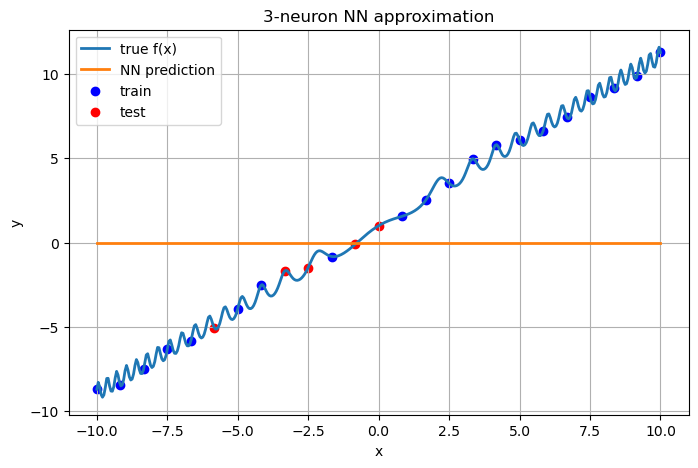

Train MSE: 45.0340986725135
Test  MSE: 6.327438950127138


In [ ]:

ACT = 'relu'   # set to 'relu'
g = relu if ACT=='relu' else tanh
g_prime = relu_prime if ACT=='relu' else tanh_prime
